In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
credit_df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Credit.csv')
credit_df.drop('Unnamed: 0', axis=1, inplace=True)


# Descriptive

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
credit_df.describe().T # T is for transpose

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


In [6]:
credit_df.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [7]:
print(credit_df['Ethnicity'].value_counts())

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64


# Distributions

## Histograms

<Axes: >

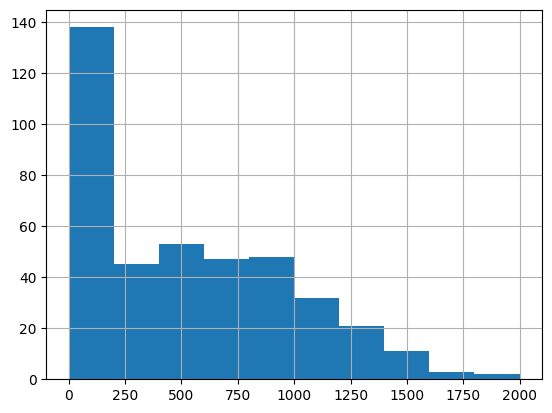

In [8]:
credit_df['Balance'].hist()

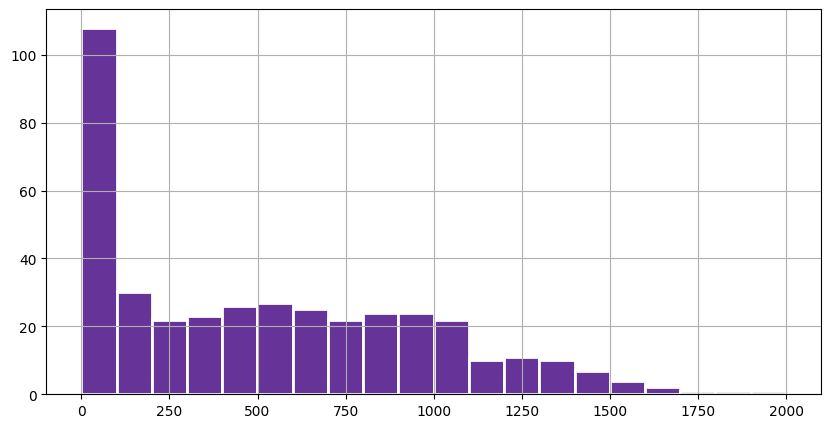

In [9]:
plt.figure(figsize=(10,5))
plt.hist(x=credit_df['Balance'],
         bins=20,
         color='rebeccapurple',
         edgecolor='white',
         linewidth=2,)
plt.grid()

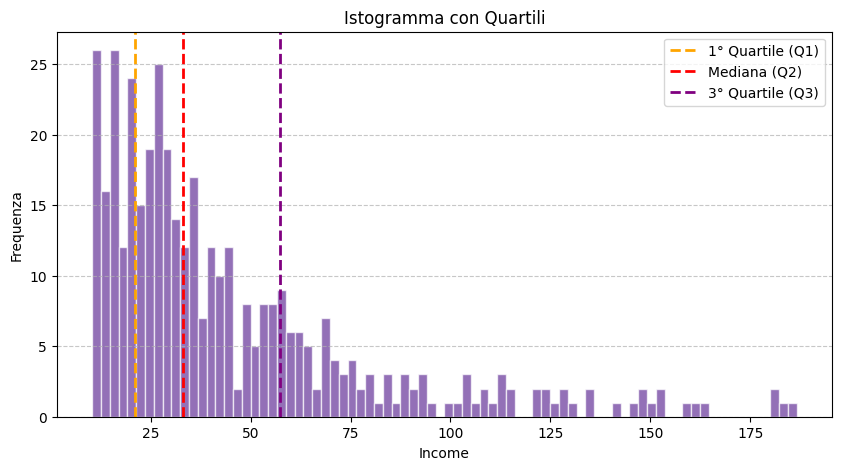

In [10]:
col_name = 'Income'
bins = 80
data = credit_df[col_name]
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()

### Multpiple plots

In [11]:
# Selezioniamo i valori di balance per i soli NON STUDENTI
balance_non_student = credit_df[credit_df['Student'] == 'No']['Balance']

# Selezioniamo i valori di balance per i soli STUDENTI
balance_student = credit_df[credit_df['Student'] == 'Yes']['Balance']

# Troviamo massimo e minimo della distribuzione
max_val, min_val = credit_df.Balance.max(), credit_df.Balance.min()

# Stampa valore minino e massion di balance
print(f"Min value: {min_val}")
print(f"Max value: {max_val}")

Min value: 0
Max value: 1999


In [12]:
# Scegliamo esattamente la dimensione e posizione dei bin 
bins_edges = np.linspace(min_val, max_val, 11)
print(bins_edges)

[   0.   199.9  399.8  599.7  799.6  999.5 1199.4 1399.3 1599.2 1799.1
 1999. ]


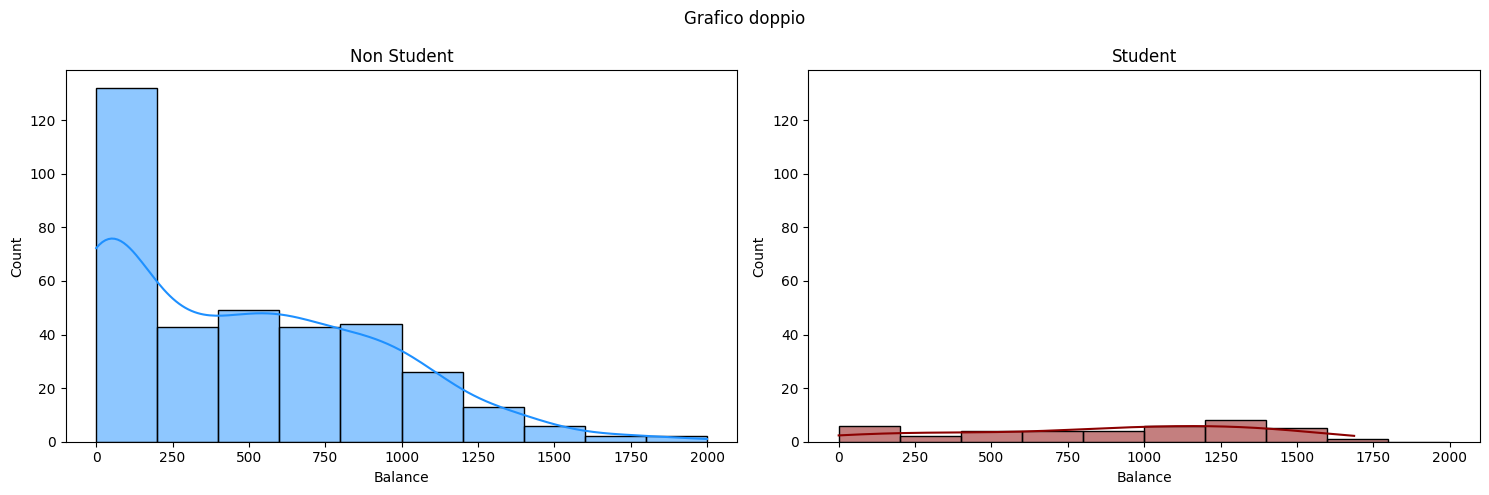

In [13]:
# Creiamo due subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Grafico doppio')

sns.histplot(balance_non_student, ax=axes[0], kde=True, color='dodgerblue', bins=bins_edges)
axes[0].set_title('Non Student')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Count')

sns.histplot(balance_student, ax=axes[1], kde=True, color='darkred', bins=bins_edges)
axes[1].set_title('Student')
axes[1].set_xlabel('Balance')

# Allineare le scale dell'asse Y
max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, max_y)
axes[1].set_ylim(0, max_y)

plt.tight_layout() # standard per migliorare il grafico
plt.show() # standard per mostrare il grafico

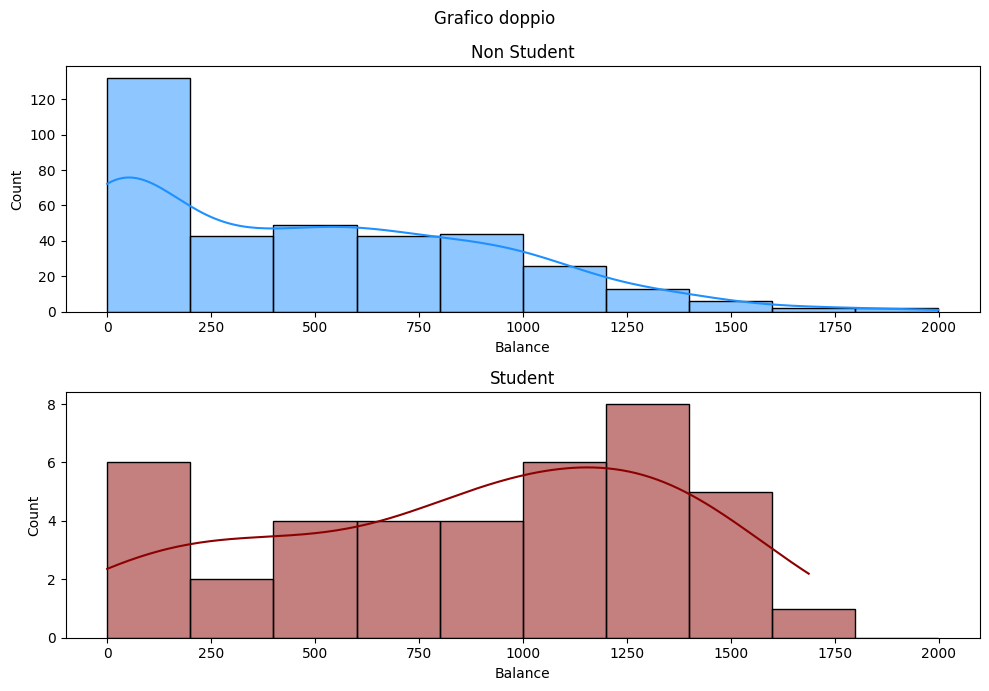

In [14]:
# Creiamo due subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

fig.suptitle('Grafico doppio')

sns.histplot(balance_non_student, ax=axes[0], kde=True, color='dodgerblue', bins=bins_edges)
axes[0].set_title('Non Student')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Count')

sns.histplot(balance_student, ax=axes[1], kde=True, color='darkred', bins=bins_edges)
axes[1].set_title('Student')
axes[1].set_xlabel('Balance')

# Allineare le scale dell'asse Y
# max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
# axes[0].set_ylim(0, max_y)
# axes[1].set_ylim(0, max_y)

plt.tight_layout() # standard per migliorare il grafico
plt.show() # standard per mostrare il grafico

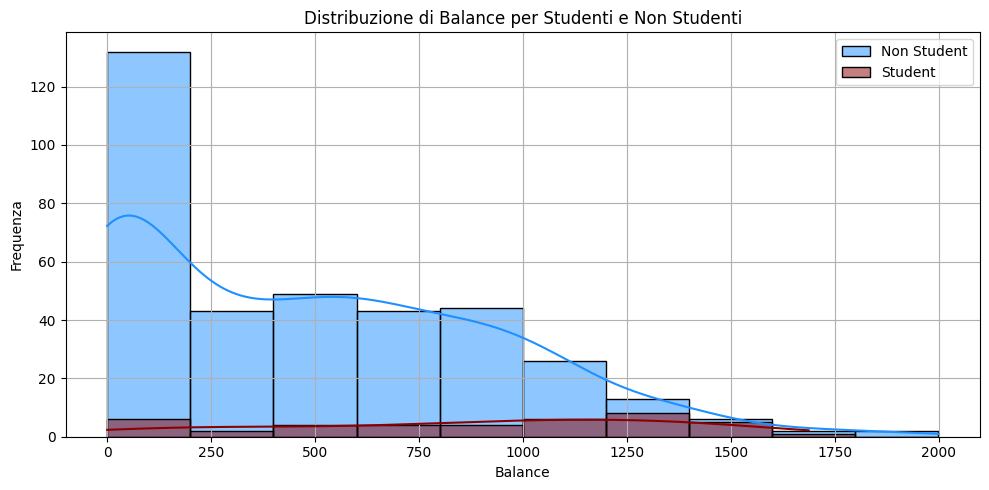

In [15]:
plt.figure(figsize=(10, 5)) # Creiamo un nuovo grafico

# Per i NON STUDENTI
sns.histplot(balance_non_student, # Istogramma per i non studenti
         bins=bins_edges, # Bins personalizzati
         color='dodgerblue', # Scelgo un colore figo
         alpha=0.5, # Trasparenza
         kde=True, # Aggiungo la KDE cioè la curva di densità
         label='Non Student') # Questo è per la legenda

# Per gli STUDENTI
sns.histplot(balance_student, # Istogramma per gli studenti
        bins=bins_edges, # Bins personalizzati
        color='darkred', # Scelgo un colore figo
        kde=True, # Aggiungo la KDE cioè la curva di densità
        alpha=0.5, # Trasparenza
        label='Student') # Questo è per la legenda

plt.title('Distribuzione di Balance per Studenti e Non Studenti') # Titolo del grafico
plt.xlabel('Balance') # Etichetta asse X
plt.ylabel('Frequenza') # Etichetta asse Y
plt.legend() # Mostra la legenda
plt.grid() # Mostra la griglia

plt.tight_layout() # Migliora il layout
plt.show() # Mostra il grafico

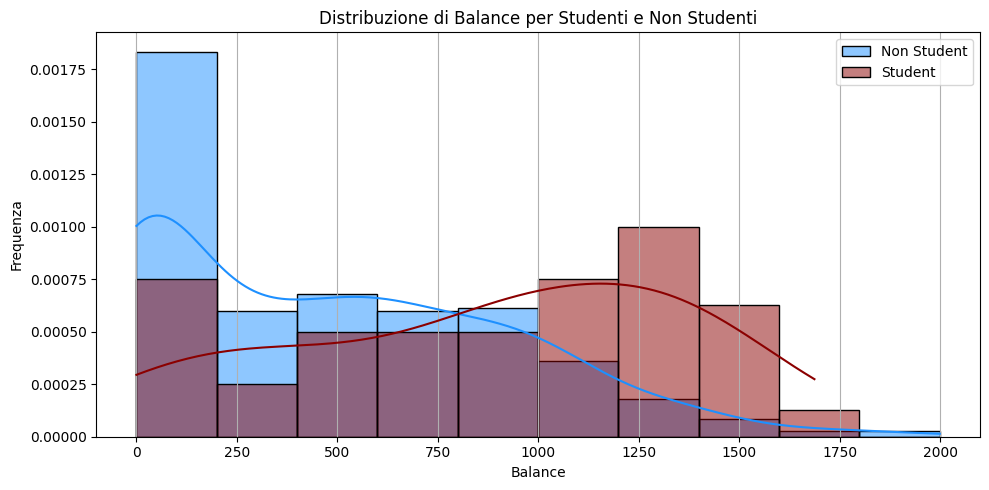

In [16]:
plt.figure(figsize=(10, 5)) # Creiamo un nuovo grafico

# Per i NON STUDENTI
sns.histplot(balance_non_student, # Istogramma per i non studenti
         bins=bins_edges, # Bins personalizzati
         stat='density',
         color='dodgerblue', # Scelgo un colore figo
         alpha=0.5, # Trasparenza
         kde=True, # Aggiungo la KDE cioè la curva di densità
         label='Non Student') # Questo è per la legenda

# Per gli STUDENTI
sns.histplot(balance_student, # Istogramma per gli studenti
        bins=bins_edges, # Bins personalizzati
        stat='density', # <------------------------------------ Aggiungo questa riga !!!
        color='darkred', # Scelgo un colore figo
        kde=True, # Aggiungo la KDE cioè la curva di densità
        alpha=0.5, # Trasparenza
        label='Student') # Questo è per la legenda

plt.title('Distribuzione di Balance per Studenti e Non Studenti') # Titolo del grafico
plt.xlabel('Balance') # Etichetta asse X
plt.ylabel('Frequenza') # Etichetta asse Y
plt.legend() # Mostra la legenda
plt.grid(axis='x') # Mostra la griglia

plt.tight_layout() # Migliora il layout
plt.show() # Mostra il grafico

#### Multiple plots

In [17]:
is_student = credit_df['Student'] == 'Yes'
is_married = credit_df['Married'] == 'Yes'
pippo_balance = credit_df['Balance']
yy = pippo_balance[is_student & is_married]
yn = pippo_balance[is_student & ~is_married]
ny = pippo_balance[~is_student & is_married]
nn = pippo_balance[~is_student & ~is_married]

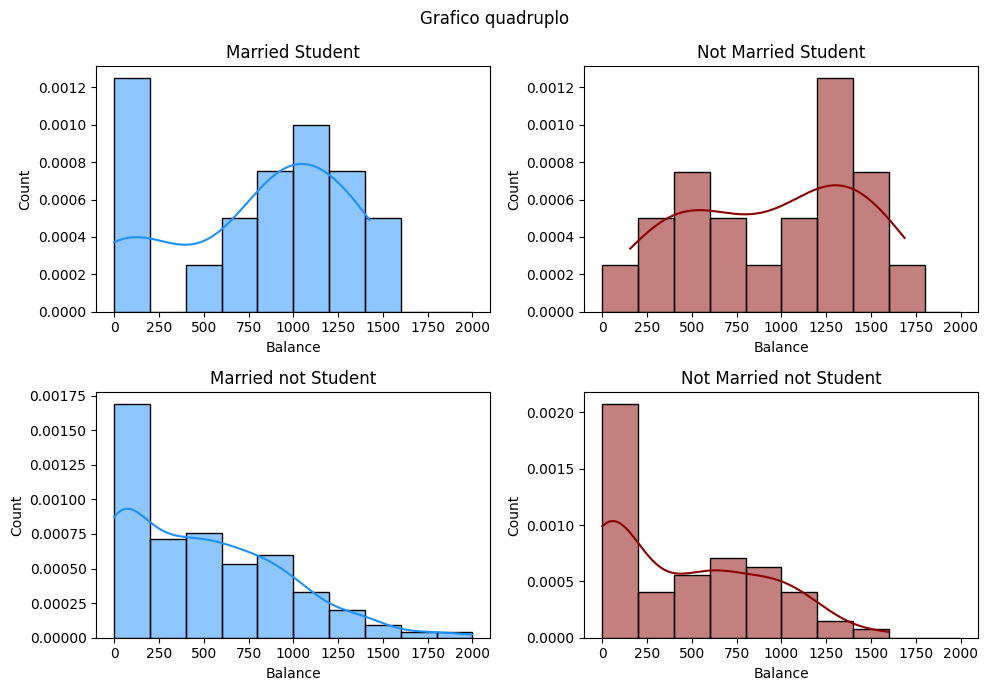

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Grafico quadruplo')
sns.histplot(yy, ax=axes[0,0], kde=True, stat='density', color='dodgerblue', bins=bins_edges)
axes[0,0].set_title('Married Student')
axes[0,0].set_xlabel('Balance')
axes[0,0].set_ylabel('Count')

sns.histplot(yn, ax=axes[0,1], kde=True, stat='density', color='darkred', bins=bins_edges)
axes[0,1].set_title('Not Married Student')
axes[0,1].set_xlabel('Balance')
axes[0,1].set_ylabel('Count')

sns.histplot(ny, ax=axes[1,0], kde=True, stat='density', color='dodgerblue', bins=bins_edges)
axes[1,0].set_title('Married not Student')
axes[1,0].set_xlabel('Balance')
axes[1,0].set_ylabel('Count')

sns.histplot(nn, ax=axes[1,1], kde=True, stat='density', color='darkred', bins=bins_edges)
axes[1,1].set_title('Not Married not Student')
axes[1,1].set_xlabel('Balance')
axes[1,1].set_ylabel('Count')
plt.tight_layout() # standard per migliorare il grafico
plt.show() # standard per mostrare il grafico

### Normal distribution

In [19]:
# Normal distribution
data = np.random.normal(scale=1.2, size=20000)
print(data)

[-1.38530395 -1.52976621 -0.69186068 ... -0.06156483 -2.76385053
 -1.33165051]


(array([3.000e+00, 1.000e+01, 3.700e+01, 1.120e+02, 2.750e+02, 6.260e+02,
        1.164e+03, 1.868e+03, 2.668e+03, 3.068e+03, 3.241e+03, 2.695e+03,
        1.920e+03, 1.209e+03, 6.350e+02, 3.110e+02, 1.100e+02, 3.800e+01,
        6.000e+00, 4.000e+00]),
 array([-4.86052406e+00, -4.37491914e+00, -3.88931423e+00, -3.40370931e+00,
        -2.91810439e+00, -2.43249947e+00, -1.94689455e+00, -1.46128963e+00,
        -9.75684713e-01, -4.90079795e-01, -4.47487584e-03,  4.81130043e-01,
         9.66734962e-01,  1.45233988e+00,  1.93794480e+00,  2.42354972e+00,
         2.90915464e+00,  3.39475955e+00,  3.88036447e+00,  4.36596939e+00,
         4.85157431e+00]),
 <BarContainer object of 20 artists>)

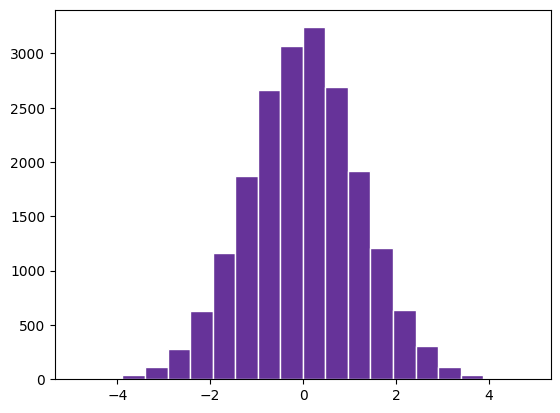

In [20]:
plt.hist(data,  edgecolor='white',
         color='rebeccapurple',
         linewidth=1,
         bins = 20)

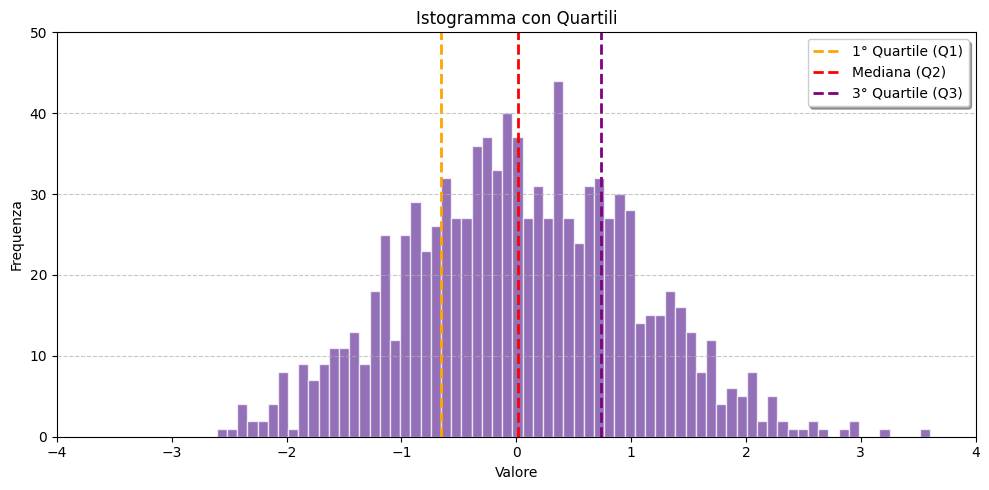

In [21]:
# Generare dati artificiali distribuiti normalmente
# np.random.seed(42)  # Imposta il seed per riproducibilità dei risultati
data = np.random.normal(
    loc=0,    # Media della distribuzione (centro dei dati)
    scale=1,  # Deviazione standard (dispersione dei dati)
    size=1000 # Numero di campioni da generare
)

# Calcolare i quartili
q1, q2, q3 = np.percentile(
    data,       # Array dei dati
    [25, 50, 75] # Percentili da calcolare (25% = Q1, 50% = mediana, 75% = Q3)
)

# Creare l'istogramma
plt.figure(
    figsize=(10, 5) # Dimensioni della figura (larghezza, altezza in pollici)
)
plt.hist(
    data, 
    bins=70,          # Numero di contenitori/barre nell'istogramma (può essere anche una lista o una stringa per algoritmi automatici)
    color="rebeccapurple",  # Colore di riempimento delle barre
    edgecolor="white", # Colore dei bordi delle barre
    alpha=0.7,        # Trasparenza (0 = trasparente, 1 = opaco)
    density=False,    # Se True, normalizza l'area a 1 (probabilità invece che conteggi)
    # cumulative=True, # Mostra la distribuzione cumulativa
    # label='Dati',    # Etichetta per la legenda
    # orientation='horizontal', # Orientamento dell'istogramma
    # histtype='step', # Tipo di istogramma ('bar', 'barstacked', 'step', 'stepfilled')
    # log=True,        # Scala logaritmica sull'asse y
    # stacked=True,    # Sovrappone più istogrammi
    # align='mid',     # Allineamento barre ('left', 'mid', 'right')
    # range=(-3, 3)    # Intervallo valori da considerare
)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel("Valore")          # Etichetta asse X
plt.ylabel("Frequenza")       # Etichetta asse Y
plt.title("Istogramma con Quartili") # Titolo del grafico
plt.legend(                   # Mostra la legenda
    loc='best',               # Posizione automatica della legenda
    frameon=True,             # Mostra lo sfondo
    shadow=True               # Aggiungi ombra
)
plt.grid(
    axis="y",       # Mostra griglia solo per l'asse Y ('both', 'x', 'y')
    linestyle="--", # Stile delle linee della griglia
    alpha=0.7       # Trasparenza della griglia
)

# Personalizzazione aggiuntiva
plt.xlim(-4, 4)      # Limiti dell'asse X
plt.ylim(0, 50)   # Limiti dell'asse Y
plt.tight_layout()   # Migliora il layout automaticamente

# Mostrare il grafico
plt.show()

# Violins

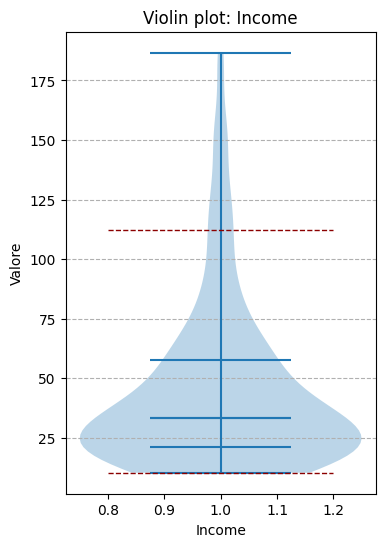

In [22]:
col_val = 'Income'
data = credit_df[col_val]
plt.figure(figsize=(4, 6))
plt.violinplot(data,
    showmedians=True,
    # showmeans=True,
    quantiles=[0.25,0.5, 0.75])
interqueritle_distance = np.percentile(data, 75) - np.percentile(data, 25)


outlier_limit_up = np.percentile(data, 75) + interqueritle_distance * 1.5
outlier_limit_down = max(np.percentile(data, 25) - interqueritle_distance * 1.5, min(data))


plt.plot([0.8, 1.2], [outlier_limit_up, outlier_limit_up], color='darkred', linestyle='dashed', linewidth=1)
plt.plot([0.8, 1.2], [outlier_limit_down, outlier_limit_down], color='darkred', linestyle='dashed', linewidth=1)

plt.title(f'Violin plot: {col_val}')
plt.xlabel(col_val)
plt.ylabel('Valore')
plt.grid(axis='y', linestyle='--')
plt.show()

C:\Users\vinor\AppData\Local\Temp\ipykernel_27308\3476202388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Student', y='Balance', data=credit_df, palette='muted', inner="box")


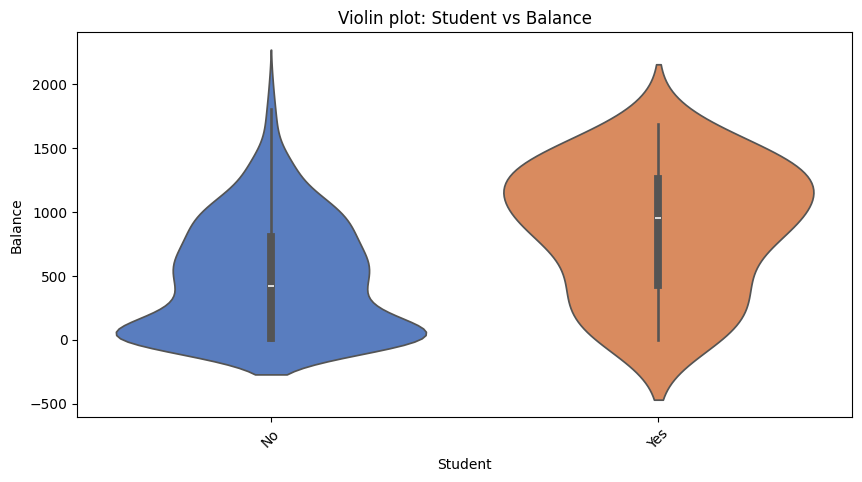

In [23]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Student', y='Balance', data=credit_df, palette='muted', inner="box")

plt.xticks(rotation=45)
plt.xlabel('Student')
plt.ylabel('Balance')
plt.title('Violin plot: Student vs Balance')
plt.show()

C:\Users\vinor\AppData\Local\Temp\ipykernel_27308\428795127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Student', y='Balance', data=credit_df, inner='quartile', palette='muted')


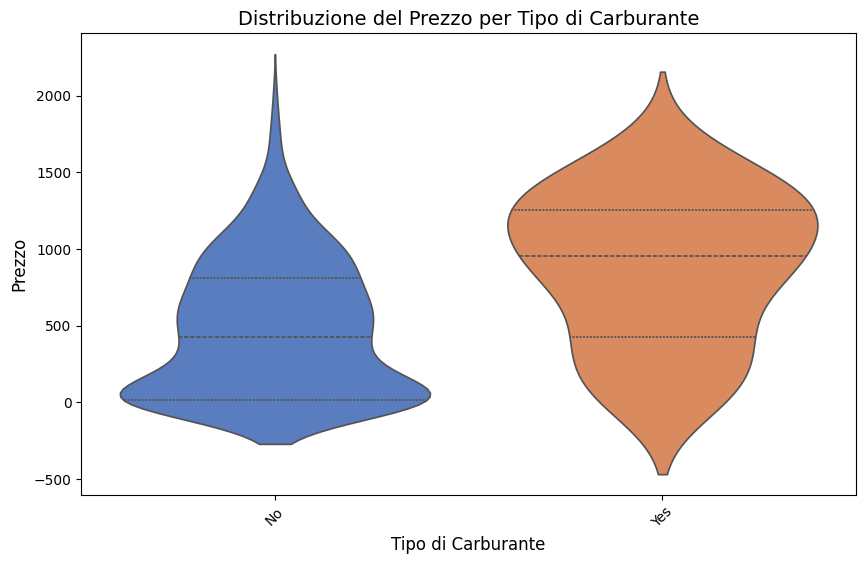

In [ ]:
# Creiamo il violin plot per visualizzare la distribuzione del prezzo in base alla colonna 'fuel'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Student', y='Balance', data=credit_df, inner='quartile', palette='muted')
plt.xticks(rotation=45)
plt.xlabel('Student')
plt.ylabel('Balance')
plt.title('Violin plot: Student vs Balance')

# Mostriamo il grafico
plt.xticks(rotation=45)  # Ruotiamo le etichette se necessario
plt.show()